# ECON 425 Homework 1

## Question 3: 


Run a Monte Carlo simulation to estimate (as accurately as possible) the train and test MSE  f
a linear regression on the first p features x, . . . , xp with the sample size n = 20. For each   ∈
(0.05, 0.3, 0.5, 0.8, 1), plot the test MSE as a function of p (take the maximum p small enough to see
a U-shaped curve). Do the same for the train MSE. What is the optimal p for each σ? Explain this
relationship.

In [1]:
#importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
#Defining sigma at various quantities
sigma = [0.05, 0.3, 0.5, 0.8,1]

In [3]:
#Setting the number of samples
number_samples = 20

In [4]:
#Setting the maximum number of features in the x variable
p_max = 10

In [5]:
#Setting a specific seed for the numpy random number generator
np.random.seed(11)

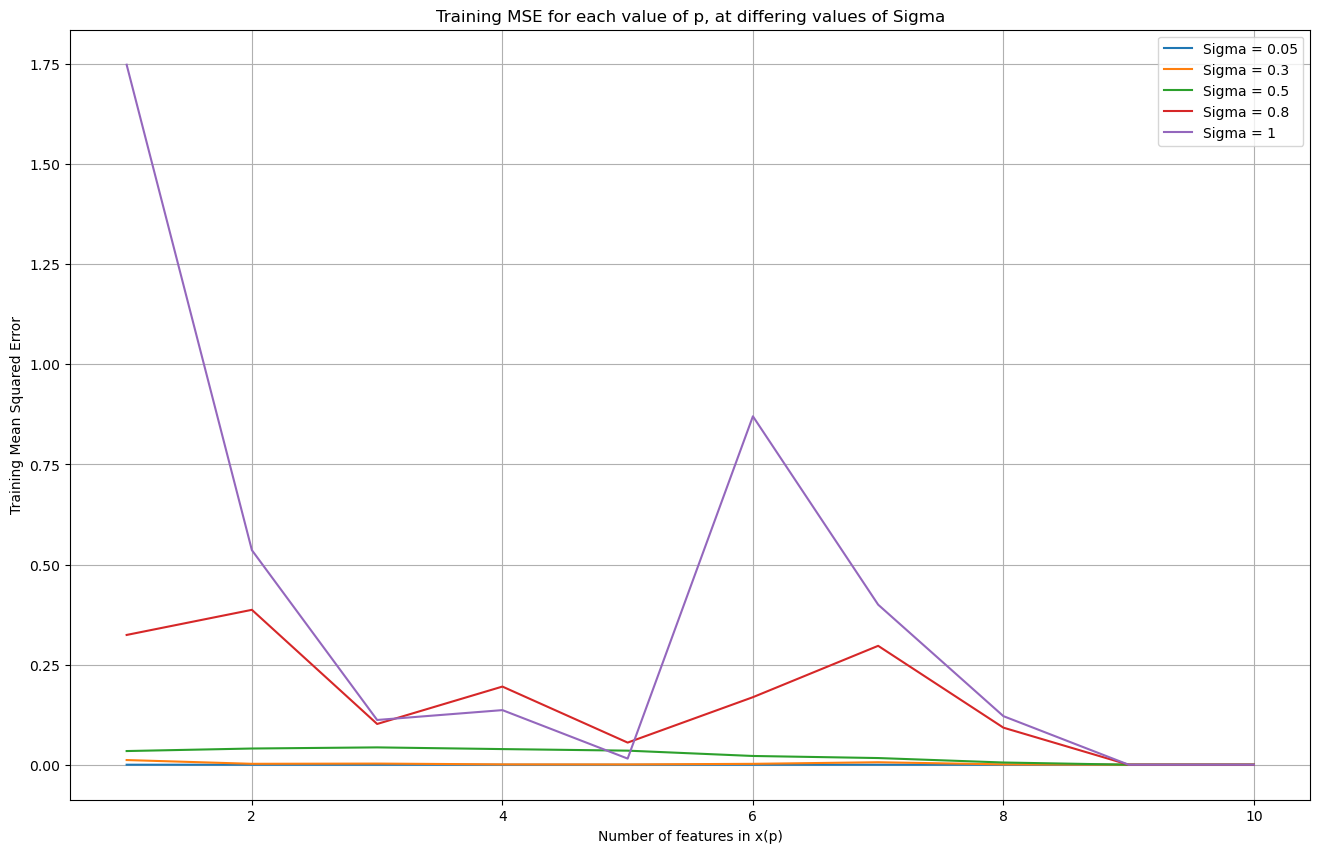

In [23]:
plt.figure(figsize= (16,10))
for i in sigma:
    MSE_train = []
    MSE_test = []
    for p in range(1, p_max+1):
        x = np.random.normal(0,1, size=(number_samples, p))
        e = np.random.normal(0,i**2, size=number_samples)
        beta = np.array([0.5 + 0.5*j/25 for j in range(1,p+1)])
        y = x.dot(beta) + e
        x_train = x[:10]
        x_test = x[10:]
        y_train = y[:10]
        y_test = y[10:]
        reg_model = LinearRegression()
        reg_model.fit(x_train, y_train)
        y_train_pred = reg_model.predict(x_train)
        y_test_pred = reg_model.predict(x_test)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        MSE_train.append(mse_train)
        MSE_test.append(mse_test)
    plt.plot(range(1,p_max+1), MSE_train, label = f"Sigma = {i}")
    
plt.title("Training MSE for each value of p, at differing values of Sigma")
plt.xlabel("Number of features in x(p)")
plt.ylabel("Training Mean Squared Error")
plt.legend()
plt.grid()
plt.show()

Based on the above graph, it is clear that the optimal number of features for each level of sigma is as follows: 

Sigma = 0.05, the blue line in the chart above has its optimal "p" at 0 or 10. 

Sigma = 0.3, the orange line in the chart above has a consistently low Test MSE, meaning that even features of 4 would be optimal. 

Sigma = 0.5, the green line in the chart above also has a consistently low Test MSE until p=9, when it reaches its minimum. Thus, the maximum features that can be integrated in the model without compromising on the validity and accuracy of the model would be 10. 

Sigma = 0.8, the red line in the chart above has a low Test MSE until p=5, after which it rises. Thus, the optimal features that can be integrated in the model without compromising on the validity and accuracy of the model would be 10.

Sigma = 1, the purple line in the chart above has a volatile Test MSE. Thus, the optimal features that can be integrated in the model without compromising on the validity and accuracy of the model would be 5 or 10.  

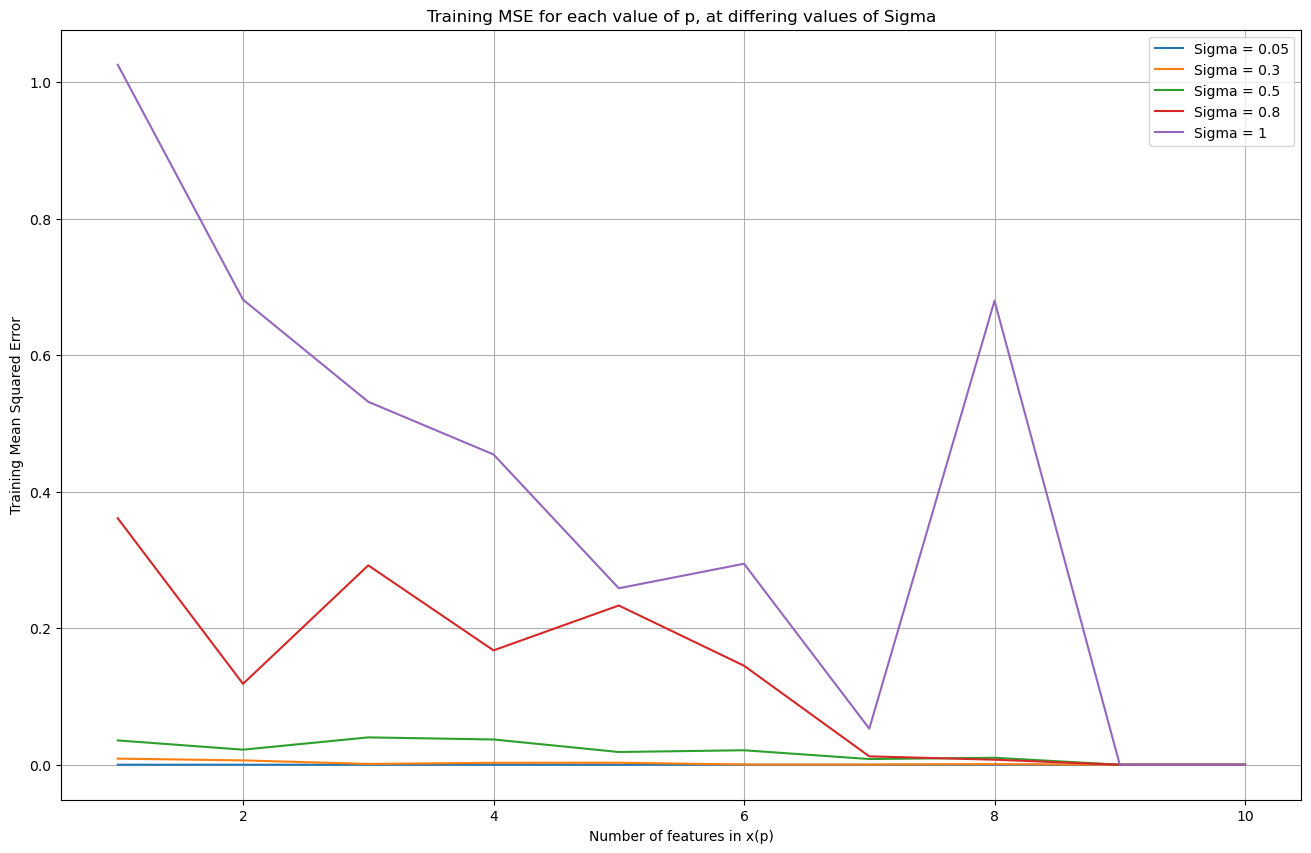

In [24]:
plt.figure(figsize= (16,10))
for i in sigma:
    MSE_train = []
    MSE_test = []
    for p in range(1, p_max+1):
        x = np.random.normal(0,1, size=(number_samples, p))
        e = np.random.normal(0,i**2, size=number_samples)
        beta = np.array([0.5 + 0.5*j/25 for j in range(1,p+1)])
        y = x.dot(beta) + e
        x_train = x[:10]
        x_test = x[10:]
        y_train = y[:10]
        y_test = y[10:]
        reg_model = LinearRegression()
        reg_model.fit(x_train, y_train)
        y_train_pred = reg_model.predict(x_train)
        y_test_pred = reg_model.predict(x_test)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        MSE_train.append(mse_train)
        MSE_test.append(mse_test)
    plt.plot(range(1,p_max+1), MSE_train, label = f"Sigma = {i}")
    
plt.title("Training MSE for each value of p, at differing values of Sigma")
plt.xlabel("Number of features in x(p)")
plt.ylabel("Training Mean Squared Error")
plt.legend()
plt.grid()
plt.show()

Based on the above graph, it is clear that the optimal number of features for each level of sigma is as follows: 

Sigma = 0.05, the blue line in the chart above has its optimal "p" at 0. 

Sigma = 0.3, the orange line in the chart above has a consistently low Training MSE, meaning that features of 10 would be optimal. 

Sigma = 0.5, the green line in the chart above also has a consistently low Training MSE, with flutctuations. Thus, the optimal features that can be integrated in the model without compromising on the validity and accuracy of the model would be 9, which is the lowest point on the graph. 

Sigma = 0.8, the red line in the chart above has a high Training MSE until p=7, after which it is consistently low. Thus, the maximum features that can be integrated in the model without compromising on the validity and accuracy of the model would be 10.

Sigma = 1, the purple line in the chart above has a very high Training MSE until p=7, after which it rises again. Thus, the optimal features that can be integrated in the model without compromising on the validity and accuracy of the model would be 9, which is the lowest point on the graph. 

## Question 4: 

Let y = x − 2x2 + ε, where x and ε are independent N (0, 1) random variables.
(a) Set a random seed, and compute the LOOCV errors from fitting the following four models using
1
least squares on n = 100 points:
y = β0 + β1x + u,
y = β0 + β1x + β2x2 + u,
y = β0 + β1x + β2x2 + β3x3 + u,
y = β0 + β1x + β2x2 + β3x3 + β4x4 + u.
Also create a scatterplot of the data.
(b) Repeat (a) using another random seed, and report your results. Are your results the same as what
you got in (a)?
(c) Which of the models in (a) had the smallest LOOCV error? Is this what you expected? Explain
your answer.
(d) Comment on the statistical significance of the coefficient estimates that results from fitting each
of the models in (a) using least squares. Do these results agree with the conclusions drawn based on
the cross-valiion results?
2


### Section A

In [8]:
#Importing the leave one out cross validation package
from sklearn.model_selection import LeaveOneOut

In [9]:
#Setting the maximum number of features in the x variable
np.random.seed(42)

In [10]:
#Setting the number of samples
number_samples = 100

In [11]:
#Defining the variables to be modelled
x = np.random.normal(0, 1, number_samples)
e = np.random.normal(0, 1, number_samples)
y = x - 2 * x**2 + e

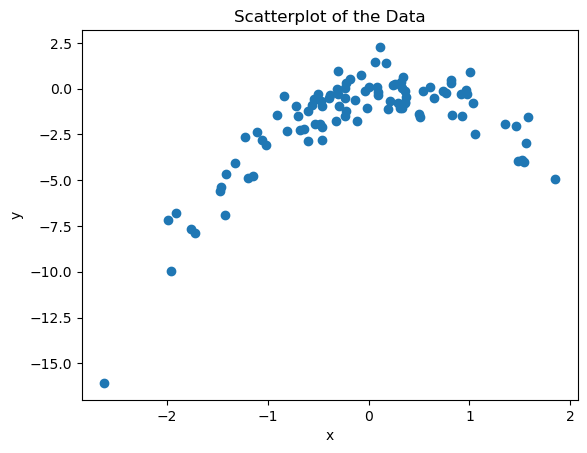

In [12]:
#Plotting the variables on a scatterplot
plt.scatter(x, y)
plt.title('Scatterplot of the Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
leave1 = LeaveOneOut()

In [14]:
# Reshape the arrays to 2D
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
max_degree = 4

In [17]:
for degrees in range(1, max_degree+1): 
    poly = PolynomialFeatures(degree=degrees)
    x_poly = poly.fit_transform(x)
    mse_scores = []
    for train_index, test_index in leave1.split(x_poly):
        x_train, x_test = x_poly[train_index], x_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = sm.OLS(y_train, sm.add_constant(x_train))
        results = model.fit()
        y_pred = results.predict(sm.add_constant(x_test))
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    leave1cv_error = np.mean(mse_scores)
    print(f"Degree {degrees}: LOOCV Error = {leave1cv_error}")

Degree 1: LOOCV Error = 5.3029566276895945
Degree 2: LOOCV Error = 0.9127641950599265
Degree 3: LOOCV Error = 0.9569572977749529
Degree 4: LOOCV Error = 0.9727724672791457


### Section B

In [18]:
#Setting the maximum number of features in the x variable
np.random.seed(90)

In [19]:
#Setting the number of samples
number_samples = 100

In [20]:
#Defining the variables to be modelled
x = np.random.normal(0, 1, number_samples)
e = np.random.normal(0, 1, number_samples)
y = x - 2 * x**2 + e

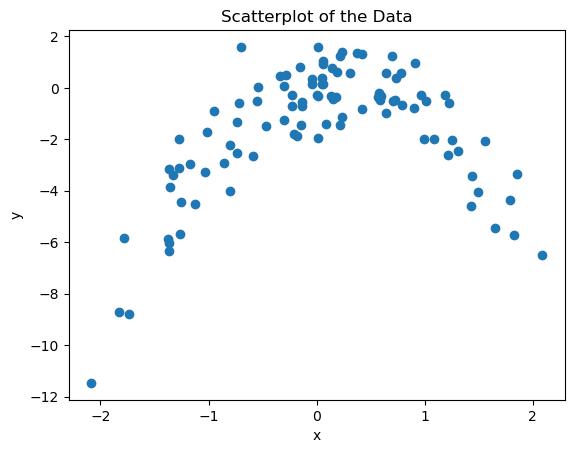

In [21]:
#Plotting the variables on a scatterplot
plt.scatter(x, y)
plt.title('Scatterplot of the Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
leave1 = LeaveOneOut()

In [23]:
# Reshape the arrays to 2D
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
max_degree = 4

In [26]:
for degrees in range(1, max_degree+1): 
    poly = PolynomialFeatures(degree=degrees)
    x_poly = poly.fit_transform(x)
    mse_scores = []
    for train_index, test_index in leave1.split(x_poly):
        x_train, x_test = x_poly[train_index], x_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = sm.OLS(y_train, sm.add_constant(x_train))
        results = model.fit()
        y_pred = results.predict(sm.add_constant(x_test))
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    leave1cv_error = np.mean(mse_scores)
    print(f"Degree {degrees}: LOOCV Error = {leave1cv_error}")

Degree 1: LOOCV Error = 5.849406592945056
Degree 2: LOOCV Error = 1.2306962621241113
Degree 3: LOOCV Error = 1.2561291715770875
Degree 4: LOOCV Error = 1.2715627718737037


### For obvious reasons related to the random number generation process, the results from the two different trials are different. 

Although they imply the same meaning, as I have analysed below that model 2 is the best fit, having the lowest Leave-One-Out Cross Validation mean squared error, the absolute values themselves are very different. 

### Section C

### Based on the two seperate instances of using different seeds to generate the variables and run the models, it is clear that model 2 has the least Leave-One-Out CV error, and is thus the best fit model within our range of choice. 

When using a numpy random number generator seed of 42, we get a LOOCV MSE of 0.912 for model 2, with degree 2. This may appear to only be marginally better than models 3 and 4, with LOOCV MSEs of 0.956 and 0.972 respectively. This marginal difference still points toward model 2 being the best available model. 

When using a numpy random number generator seed of 90, we get a LOOCV MSE of 1.230 for model 2, with degree 2. Once again, this is only marginally better than models 3 and 4, with LOOCV MSEs of 1.256 and 1.271 respectively. This marginal difference still points toward model 2 being the best available model. 

Intuitively, this performance of model 2 is down to the original definition of y, which is a quadratic function of x, with artifical noise integrated in the form of the term "e" or epsilon. Thus, the results of the models are in line with expectations before running them. 

In [27]:
for degrees in range(1, max_degree+1): 
    poly = PolynomialFeatures(degree=degrees)
    x_poly = poly.fit_transform(x)
    model = sm.OLS(y, sm.add_constant(x_poly))
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.26
Date:                Thu, 18 Jan 2024   Prob (F-statistic):            0.00113
Time:                        17:07:17   Log-Likelihood:                -226.65
No. Observations:                 100   AIC:                             457.3
Df Residuals:                      98   BIC:                             462.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6843      0.236     -7.140      0.0

## Based on the summaries of the regression models, it is clear that only the first and second coefficients are statistically significant across all of the models. 

In model 1, coefficient 1 has a p-value of 0.001 and a t-value of 3.356, meaning that it is statistically significant at the 95% confidence level. 
In model 2, coefficients 1 and 2 have p-values of 0.000 and absolute t-values of 7.69 and 19.059, meaning they are statistically significant at the 95% confidence level. 

In models 3 and 4, it is clear from the p-values and the t-values that the third and fourth coefficients, pertaining to the cubic and biquadratic terms are not statistically significant at the 95% confidence level. 